<a href="https://colab.research.google.com/github/hstewari/Quantum-Computing/blob/main/Single_Qubit_Gates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the packages
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-3020g77n
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-3020g77n
     |████████████████████████████████| 6.1MB 16.2MB/s 
     |████████████████████████████████| 18.0MB 183kB/s 
     |████████████████████████████████| 235kB 46.7MB/s 
     |████████████████████████████████| 215kB 36.6MB/s 
     |████████████████████████████████| 2.1MB 35.4MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 1.5MB 26.3MB/s 
     |████████████████████████████████| 952kB 35.7MB/s 
     |████████████████████████████████| 33.9MB 88kB/s 
     |████████████████████████████████| 194kB 50.4MB/s 
     |████████████████████████████████| 71kB 11.2MB/s 
     |████████████████████████████████| 645kB 46.0MB/s 
     |████████████████████████████████| 3.2MB 36.5MB/s 
     |████████████████████████████████| 6.3MB 24.7MB/s 
  Create

In [2]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

# ***Pauli Gates - X Gate***

In [3]:
# create the circuit with X-Gate (Pauli-X matrix) on a |0> qubit and draw the circuit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q_0: ┤ X ├
     └───┘

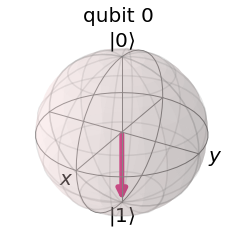

In [4]:
# display the result in the Bloch Sphere
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

# ***Exercise - Apply X Gate (Pauli-X matrix) on |1> qubit***

In [5]:
# create the circuit with 1 qubit
qc_x = QuantumCircuit(2)
# apply the X Gate on |1> qubit
qc_x.x(1) 
# draw the circuit
qc_x.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘

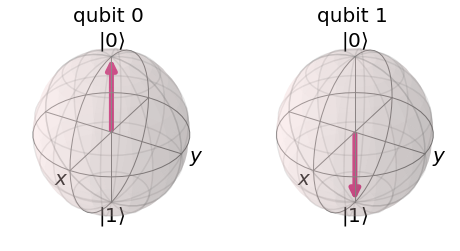

In [6]:
# save it as the statevector
qc_x.save_statevector()
# create the object
qobj = assemble(qc_x)
# get the result by running the simulator
result = sim.run(qobj).result().get_statevector()
# draw it in bloch sphere
plot_bloch_multivector(result)


In [7]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [8]:
qc.y(0)
qc.z(0)
qc.draw()

┌───┐ ░ ┌───┐┌───┐
q_0: ┤ X ├─░─┤ Y ├┤ Z ├
     └───┘ ░ └───┘└───┘

In [9]:
# Run the code in this cell to see the widget
gate_demo(gates='pauli+h')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [12]:
# Create the X-measurement function:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialize our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw()

┌──────────────────────────────┐┌───┐┌─┐
q_0: ┤ Initialize(0.70711,-0.70711) ├┤ H ├┤M├
     └──────────────────────────────┘└───┘└╥┘
c: 1/══════════════════════════════════════╩═
                                           0

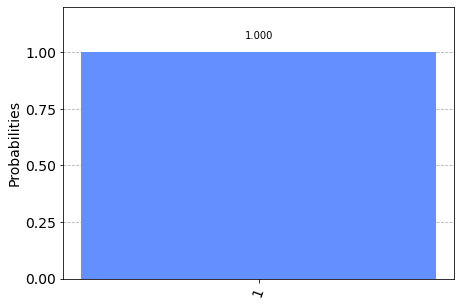

In [13]:
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

In [14]:
# Exercise - |+> basis
initial_state = [1/sqrt(2), 1/sqrt(2)]
# Initialize our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw()

┌─────────────────────────────┐┌───┐┌─┐
q_0: ┤ Initialize(0.70711,0.70711) ├┤ H ├┤M├
     └─────────────────────────────┘└───┘└╥┘
c: 1/═════════════════════════════════════╩═
                                          0

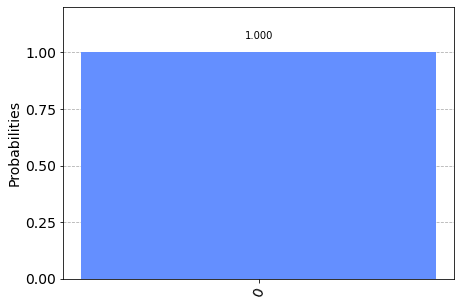

In [15]:
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector